<a href="https://colab.research.google.com/github/criscastiaq/ML_UTALCA/blob/main/Proyecto_ML_CCastillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargando librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador
import IPython.core.display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbn

def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles()

# Cargamos nuestro set de datos a trabajar

In [3]:
url = "https://sinca.mma.gob.cl/cgi-bin/APUB-MMA/apub.tsindico2.cgi?outtype=xcl&macro=./RVII/709/Cal/PM25//PM25.horario.horario.ic&from=120707&to=211130&path=/usr/airviro/data/CONAMA/&lang=esp&rsrc=&macropath="
data = pd.read_csv(url, sep=";",decimal=",")

In [4]:
#Este permite modificar las representaciones de las columnas de fecha y hora 
#para ser reemplazadas por una sola columna con formato estandar de Python
data['FECHA (YYMMDD)']=data['FECHA (YYMMDD)']+20000000 #se le agrega '20' a todos los años

#con los códigos a continuación se reemplaza la visualización de la columna horas para poder ser manipuladas
#por la función datatime
data.loc[data['HORA (HHMM)'] ==0,  'HORA (HHMM)']='0000'
data.loc[data['HORA (HHMM)'] ==100,  'HORA (HHMM)']='0100'
data.loc[data['HORA (HHMM)'] ==200,  'HORA (HHMM)']='0200'
data.loc[data['HORA (HHMM)'] ==300,  'HORA (HHMM)']='0300'
data.loc[data['HORA (HHMM)'] ==400,  'HORA (HHMM)']='0400'
data.loc[data['HORA (HHMM)'] ==500,  'HORA (HHMM)']='0500'
data.loc[data['HORA (HHMM)'] ==600,  'HORA (HHMM)']='0600'
data.loc[data['HORA (HHMM)'] ==700,  'HORA (HHMM)']='0700'
data.loc[data['HORA (HHMM)'] ==800,  'HORA (HHMM)']='0800'
data.loc[data['HORA (HHMM)'] ==900,  'HORA (HHMM)']='0900'

#Aquí se transforman a string las columnas de FECHA y HORA
data['FECHA (YYMMDD)'] = data['FECHA (YYMMDD)'].apply(lambda _: str(_))
data['HORA (HHMM)'] = data['HORA (HHMM)'].apply(lambda _: str(_))+'00'

#Se unifican en una sola columna y se guardan en la columna FECHA
data['FECHA (YYMMDD)'] =data['FECHA (YYMMDD)']+data['HORA (HHMM)']

#se utiliza la función datatime en la columna fecha para darle el formato estandar de Python
data['FECHA (YYMMDD)'] = pd.to_datetime(data['FECHA (YYMMDD)'], format='%Y%m%d%H%M%S')
data.rename(columns={'FECHA (YYMMDD)': 'TIEMPO(YY-MM-DD HH:MM:SS)'}, inplace=True)

#se eliminan la última columna y la columna Hora
data= data.drop(data.columns[5], axis='columns')
del data['HORA (HHMM)']

#visualización de las variables
print(data.shape)
data.head(5) 


(82415, 4)


,TIEMPO(YY-MM-DD HH:MM:SS),Registros validados,Registros preliminares,Registros no validados
0,2012-07-07 01:00:00,NaN,NaN,NaN
1,2012-07-07 02:00:00,NaN,NaN,NaN
2,2012-07-07 03:00:00,NaN,NaN,NaN
3,2012-07-07 04:00:00,NaN,NaN,NaN
4,2012-07-07 05:00:00,NaN,NaN,NaN


# Análisis inicial: Análisis Exploratorio de datos

In [5]:
# Entendiendo nuestro set de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82415 entries, 0 to 82414
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TIEMPO(YY-MM-DD HH:MM:SS)  82415 non-null  datetime64[ns]
 1   Registros validados        57743 non-null  float64       
 2   Registros preliminares     16484 non-null  float64       
 3   Registros no validados     2743 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.5 MB


In [6]:
# Empezamos realizando un análisis descriptivo de las variables para entender sus dimensiones
data.describe()

,Registros validados,Registros preliminares,Registros no validados
count,57743.000000,16484.000000,2743.000000
mean,26.576942,24.837794,173.897907
std,38.592488,34.566945,330.481939
min,1.000000,1.000000,-9.276490
25%,8.000000,9.000000,8.090000
50%,14.180000,14.000000,26.970000
75%,28.857050,25.000000,98.400000
max,612.000000,500.000000,1000.000000


De forma rápida podemos obtener el porcentaje de valores perdidos por variable y analizar qué variables son adecuadas para imputar y cuales se deberían descartar.

In [7]:
# explorando la cantidad de valores perdidos en las variables
data.isna().sum()/data.shape[0]*100

TIEMPO(YY-MM-DD HH:MM:SS)     0.000000
Registros validados          29.936298
Registros preliminares       79.998787
Registros no validados       96.671722
dtype: float64

Matrix missing: Mostramos una matriz de calor para visualizar las variables con mayor presencia de valores perdidos. Las líneas blancas indican los valores faltantes en cada columna.

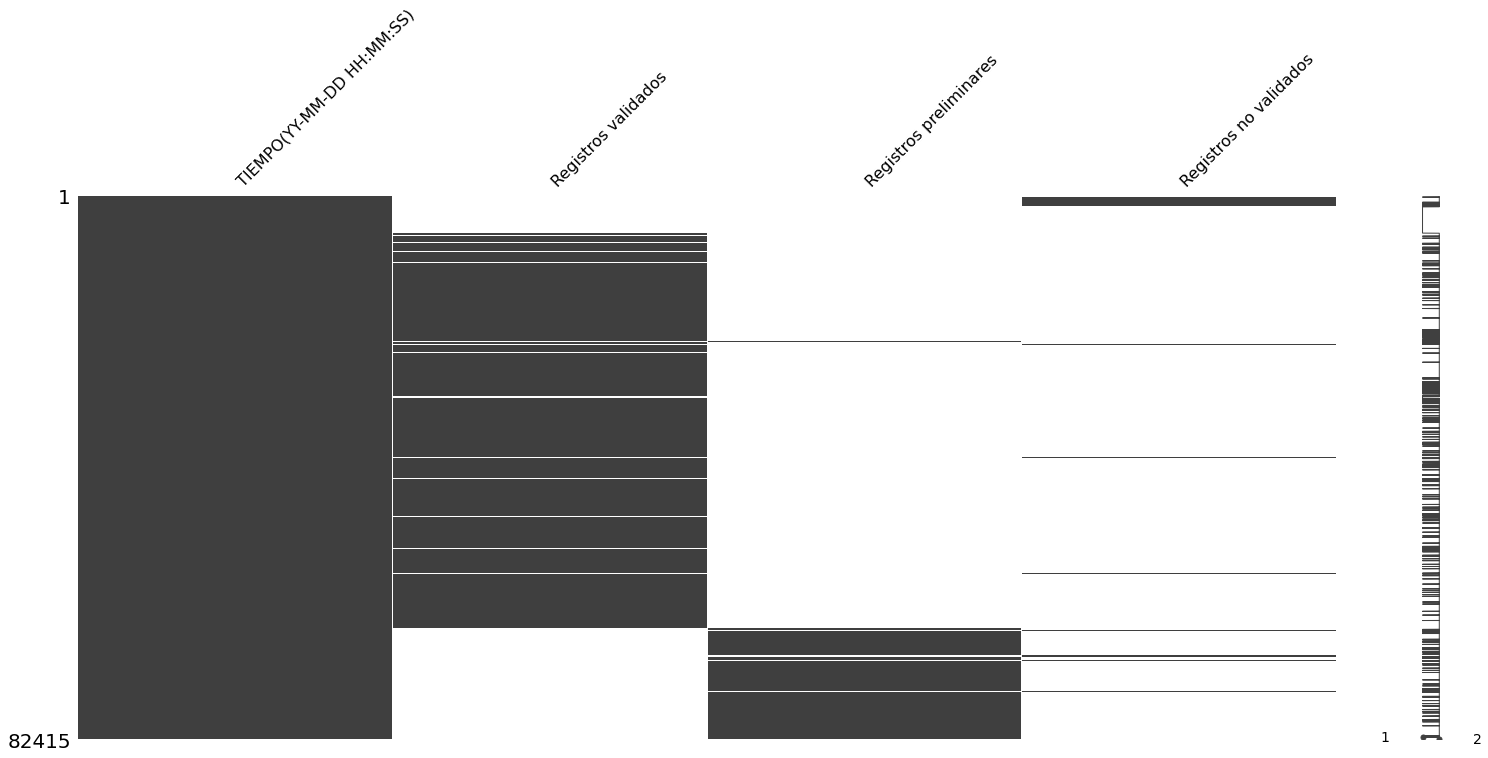

In [8]:
# matrix missing
msno.matrix(data)

heatmap missing cor: El mapa de calor muestra una correlación positiva con el azul. Cuanto más oscuro sea el tono de azul, mayor será la correlación.

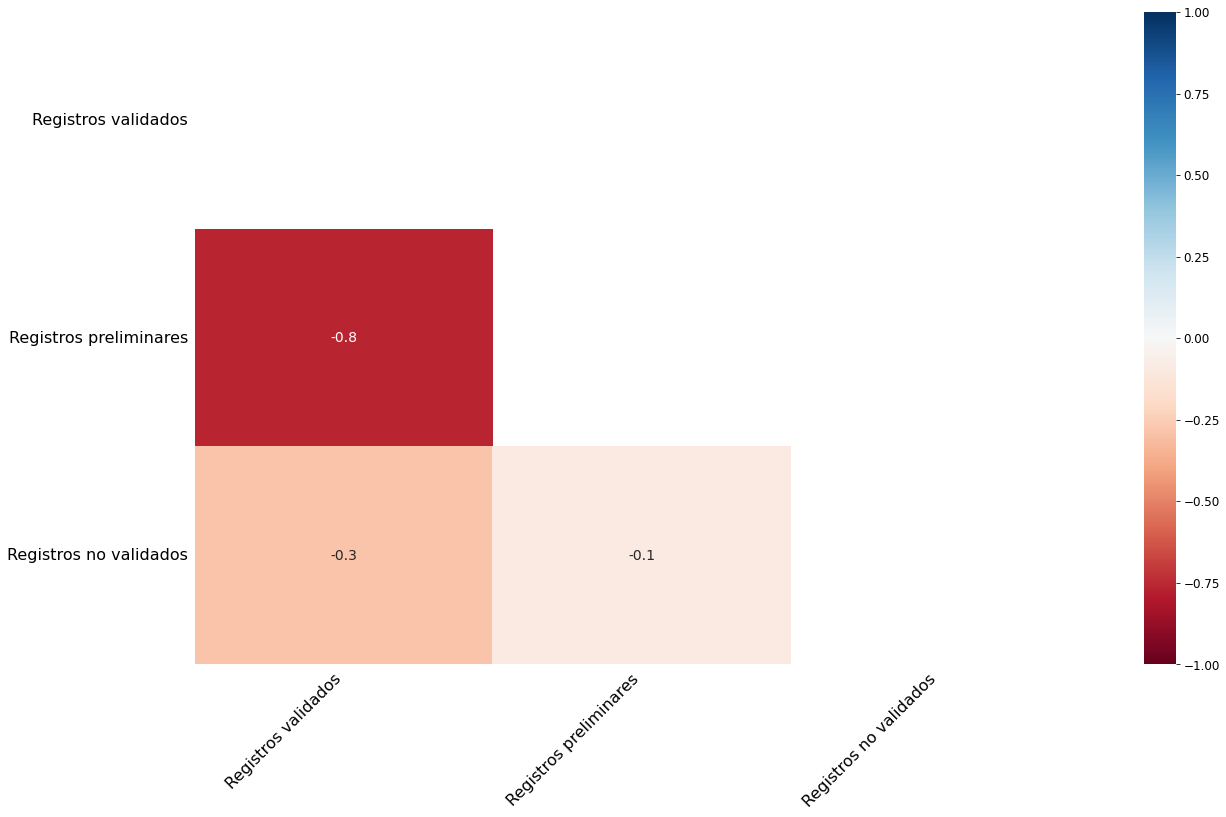

In [9]:
# heatmap missing
msno.heatmap(data)

bar missing: Otra forma de visualizar los datos de los valores perdidos es mediante el uso de gráficos de barras. Estas barras muestran los valores que son proporcionales a los datos que no faltan en el conjunto de datos. Junto con eso, también se muestra el número de valores que faltan.

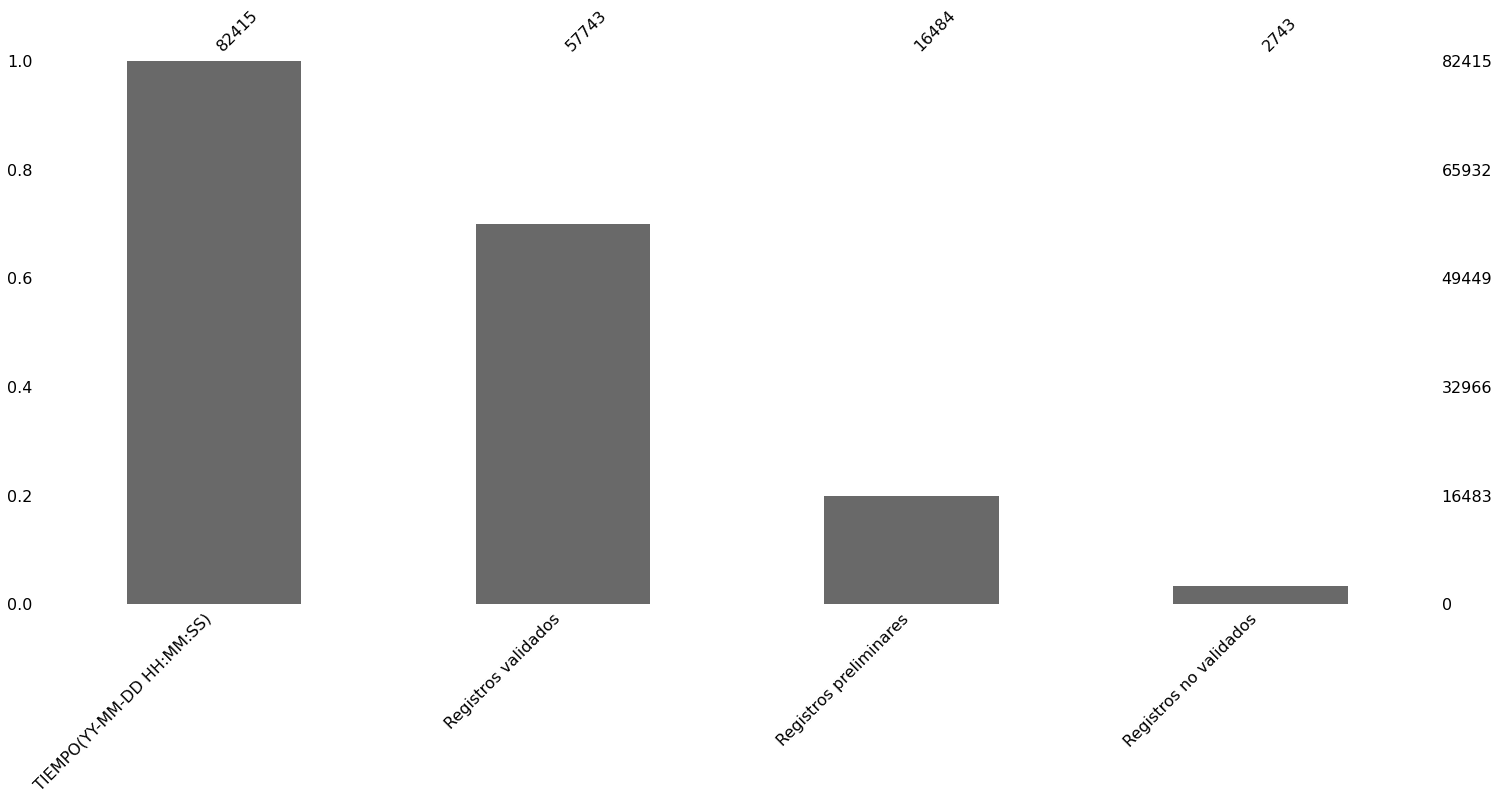

In [10]:
# bar missing
msno.bar(data)

Referencia: https://cesarquezadab.com/2021/09/19/guia-sobre-tecnicas-de-imputacion-de-datos-con-python/

Se podría trabajar con la imputación de datos con las variables separadas, sin embargo, a solicitud de este trabajo se debe trabajar con las variables de 'Registros validados', 'Registros preliminares' y 'Registros no validados' como una sola.

Al analizar los datos, se observa que no se presentan casos en que hay 2 o 3 datos en una misma fila, por lo que, para representar toda la información en una sola columna, se suman las 3 columnas.

In [11]:
#Primero se reemplazan las variables NaN por '0's porque sino, al sumar un NaN + 0, el resultado es NaN
data.iloc[:,1].fillna(0, inplace=True)
data.iloc[:,2].fillna(0, inplace=True)
data.iloc[:,3].fillna(0, inplace=True)

#Se crea una nueva columna 'Registro contaminacion'
data['Registros contaminacion'] = data.iloc[:,1]+data.iloc[:,2]+data.iloc[:,3]

print(data.head())

  TIEMPO(YY-MM-DD HH:MM:SS)  ...  Registros contaminacion
0       2012-07-07 01:00:00  ...                      0.0
1       2012-07-07 02:00:00  ...                      0.0
2       2012-07-07 03:00:00  ...                      0.0
3       2012-07-07 04:00:00  ...                      0.0
4       2012-07-07 05:00:00  ...                      0.0

[5 rows x 5 columns]


In [12]:
#Se eliminan las columnas de  'Registros validados', 'Registros preliminares' y 'Registros no validados' 
data_new=data
data_new= data_new.drop(data.columns[1], axis='columns')
data_new= data_new.drop(data.columns[2], axis='columns')
data_new= data_new.drop(data.columns[3], axis='columns')

print(data_new.head())

  TIEMPO(YY-MM-DD HH:MM:SS)  Registros contaminacion
0       2012-07-07 01:00:00                      0.0
1       2012-07-07 02:00:00                      0.0
2       2012-07-07 03:00:00                      0.0
3       2012-07-07 04:00:00                      0.0
4       2012-07-07 05:00:00                      0.0


Se trabaja finalemente con el dataframe 'data_new' que contiene solamente el tiempo en formato estandar en la primera columna y en la segunda columna los registros de contaminación.

En este nuevo caso no se puede aplicar la técnica de eliminar valores perdidos debido a que con el arreglo anterior de pasar todo a una misma columna y rellenar con 0.0 los datos NaN, no se identifican celdas vacías de información.

Para resolver el problema de los datos faltantes se aplican dos técnicas distintas, la de la media y la mediana y se contrastan los valores.

El método de imputación más simple es reemplazar los valores perdidos con los valores medios o medianos del conjunto de datos en general, o alguna estadística de resumen similar. Esto tiene la ventaja de ser el enfoque más simple posible y uno que no introduce ningún sesgo indebido en el conjunto de datos.

In [13]:
df_imput = data_new # Copiamos nuestra base de datos para probar técnicas de imputación de datos
df_imput.isnull().sum()/df_imput.shape[0]

df_imput['RC_imput_1'] = df_imput['Registros contaminacion'].fillna(df_imput['Registros contaminacion'].mean()) # Imputando los valores perdidos por la media
df_imput['RC_imput_2'] = df_imput['Registros contaminacion'].fillna(df_imput['Registros contaminacion'].median()) # Imputando los valores perdidos por la mediana
df_imput[['Registros contaminacion','RC_imput_1','RC_imput_2']].describe() 


,Registros contaminacion,RC_imput_1,RC_imput_2
count,82415.000000,82415.000000,82415.000000
mean,29.376455,29.376455,29.376455
std,75.353097,75.353097,75.353097
min,-9.276490,-9.276490,-9.276490
25%,7.000000,7.000000,7.000000
50%,13.000000,13.000000,13.000000
75%,27.000000,27.000000,27.000000
max,1000.000000,1000.000000,1000.000000


De aquí se ve que para la técnica de la mediana y la media entrega los mismos resultados, escogiendo el de la media

In [14]:
media=data_new['Registros contaminacion'].mean()
data_new.loc[data_new['Registros contaminacion']<=0,'Registros contaminacion']=media
del data_new['RC_imput_1']
del data_new['RC_imput_2']

# METODO ALTERNATIVO NO IMPLEMENTADO

Esta es una propuesta que por tiempo no implementé, pero que me hace más sentido y que describo a continuación.

La propuesta consiste en reemplazar los datos vacíos no por la media o mediana de todo el conjunto de datos sino que solamente por un promedio específico, los cuales pueden ser:

1. Promedio de las mismas horas de toda la base de dato, es decir, si falta un dato de la hora 01:00:00, entonces se hace un promedio de toda la base de datos de las filas que correspondan a esas horas.
2. Promedio de las mismas horas pero clasificadas por mes, ya que pueden haber variaciones entre los meses
3. Promedio de las mismas horas pero por año o una mezcla de meses y años.

En general, la idea es que se pueda ser un poco más específico con los valores que se reemplazarán y con una tendencia un poco más coherente con lo que pasa en esas horas especificas.

# Gráfico de la serie de tiempo de las variables de contaminacion

El primer gráfico corresponde a la serie de tiempo completa del dataframe, posteriormente se filtrarán por fecha para evaluar diferencias en los datos apreciadas a simple vista.

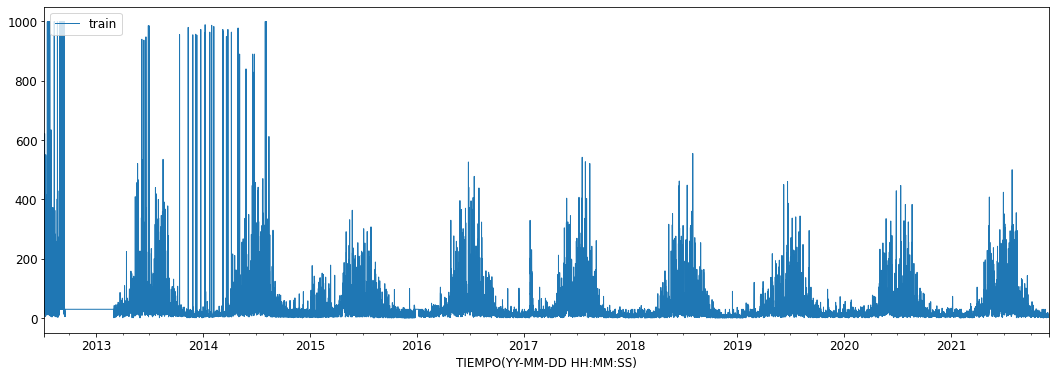

In [15]:
fig, ax = plt.subplots(figsize=(18,6))
data_new.plot(x="TIEMPO(YY-MM-DD HH:MM:SS)", y="Registros contaminacion", ax=ax, label="train")

plt.legend(loc='upper left')

plt.show();

Se eliminarán los datos desde el año 2015 hacia atrás y del 2016, guardándolos en nuevos dataframe para analizarlos y comparalos con el dataframe completo. Esta decisión se basa en que los primero datos a simple vista se ven demasiado variables, en cambio, a partir de los años mencionados se logra ver una tendencia similar por años.

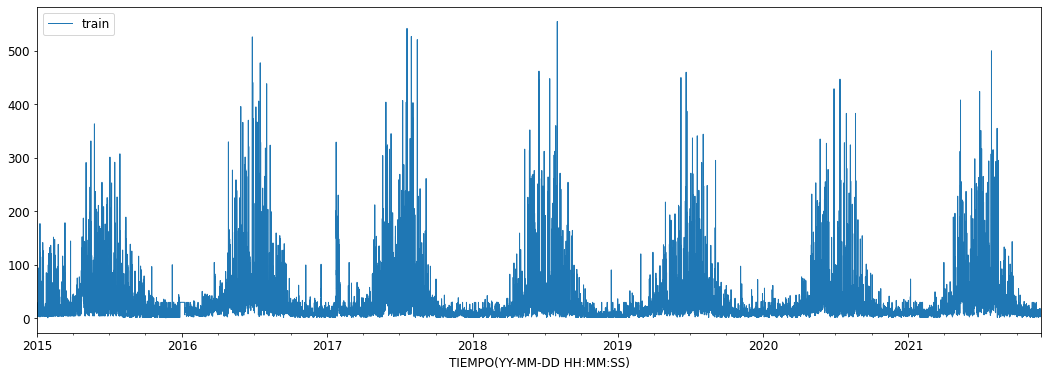

In [16]:
data_new_15=data_new.iloc[21791:] #corresponde a la serie de datos del 2015 en adelante
fig, ax = plt.subplots(figsize=(18,6))
data_new_15.plot(x="TIEMPO(YY-MM-DD HH:MM:SS)", y="Registros contaminacion", ax=ax, label="train")

plt.legend(loc='upper left')

plt.show();

TIEMPO(YY-MM-DD HH:MM:SS)    datetime64[ns]
Registros contaminacion             float64
dtype: object


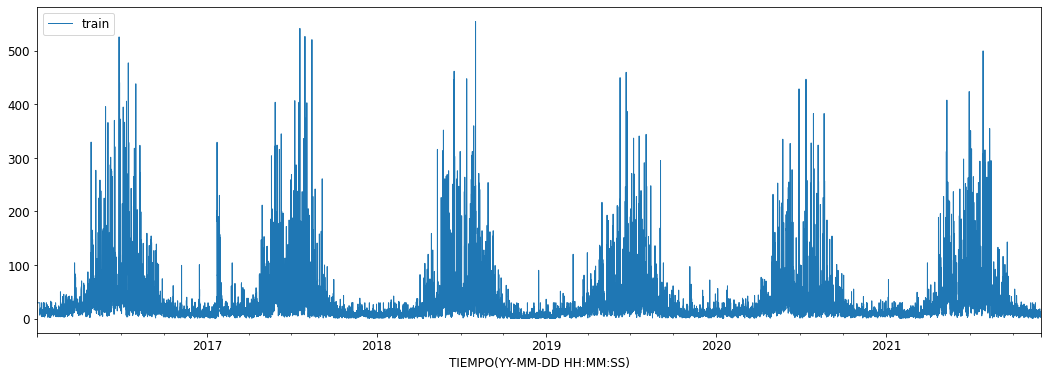

In [19]:
data_new_16=data_new.iloc[30552:] #corresponde a la serie de datos del 2016 en adelante
print(data_new_16.dtypes)
fig, ax = plt.subplots(figsize=(18,6))
data_new_16.plot(x="TIEMPO(YY-MM-DD HH:MM:SS)", y="Registros contaminacion", ax=ax, label="train")

plt.legend(loc='upper left')

plt.show();

A simple vista, se ve que desde el año 2015 en adelante, se aprecia un patron repetitivo y similar hacia adelante, sin embargo, desde el 2016 es mucho mas claro ese patron. A pesar que a inicios del 2017 se ve un peak que no se repite más adelante, se dejan desde el 2016 por el volumen de datos para el entrenamiento.

Selección de rango de entrenamiento y prueba. Se selecciona por periodo, que en este caso corresponde a un intervalo desde el inicio hasta finales del año 2019. Lo cual corresponde cercano al 80%

In [18]:
train_range = data_new[data_new.iloc[:,0] < '2020-01-01'].index #Considera cerca del 80% de entrenamiento
test_range = data_new[(data_new.iloc[:,0] >= '2020-01-01')].index
train_range_15 = data_new_15[data_new_15.iloc[:,0] < '2020-01-01'].index #Considera cerca del 70% de entrenamiento
test_range_15 = data_new_15[(data_new_15.iloc[:,0] >= '2020-01-01')].index
train_range_16 = data_new_16[data_new_16.iloc[:,0] < '2021-01-01'].index #Considera cerca del 80% de entrenamiento
test_range_16 = data_new_16[(data_new_16.iloc[:,0] >= '2021-01-01')].index
train_range_16a = data_new_16[data_new_16.iloc[:,0] < '2020-01-01'].index #Considera cerca del 66% de entrenamiento
test_range_16a = data_new_16[(data_new_16.iloc[:,0] >= '2020-01-01')].index

Entrenamiento del modelo

In [20]:
from fbprophet import Prophet
data_new=data_new_16
train_range=train_range_16
test_range=test_range_16
data_new.columns = ["period", "value"]

df_prophet_train = data_new.loc[train_range][["period", "value"]]
df_prophet_train.columns = ["ds", "y"]

model = Prophet();

model.fit (df_prophet_train)

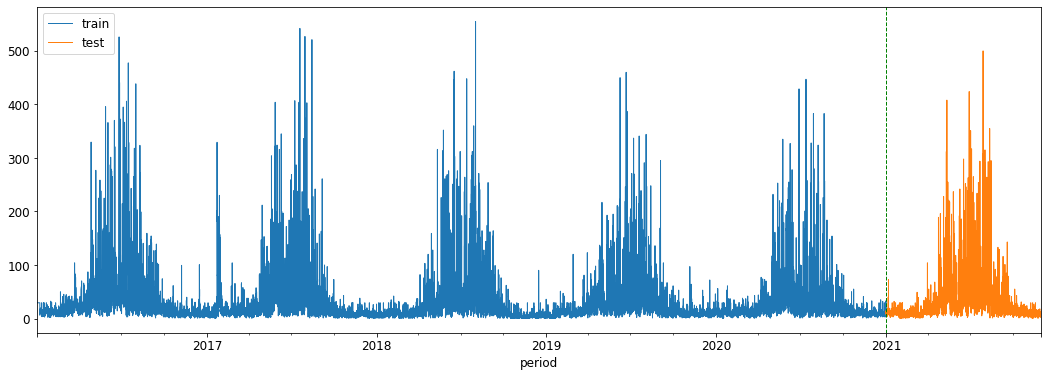

In [21]:
#Gráfico de intervalos de entrenamiento y de prueba
fig, ax = plt.subplots(figsize=(18,6))
data_new.loc[train_range].plot(x="period", y="value", ax=ax, label="train")
data_new.loc[test_range].plot(x="period", y="value", ax=ax, label="test")

plt.axvline(pd.to_datetime(str(data_new.loc[test_range].period.values[0])), c='green', ls='--', lw=1)
plt.legend(loc='upper left')

Prueba de predicción

In [22]:
df_prophet_test = data_new.loc[test_range][["period", "value"]]
df_prophet_test.columns = ["ds", "y"]

forecast = model.predict(df_prophet_test[["ds"]])
forecast_ci = forecast[['ds', 'yhat_lower', 'yhat_upper']].set_index('ds')

yhat_test = forecast.yhat.values
y_test = data_new.loc[test_range].values
y_test = data_new.loc[test_range].iloc[:,1].values

print(y_test)
print(yhat_test)

[ 8. 14. 11. ...  7. 11.  7.]
[21.50890539 17.30095379 12.9552608  ... 28.42781733 28.61632042
 26.0794343 ]


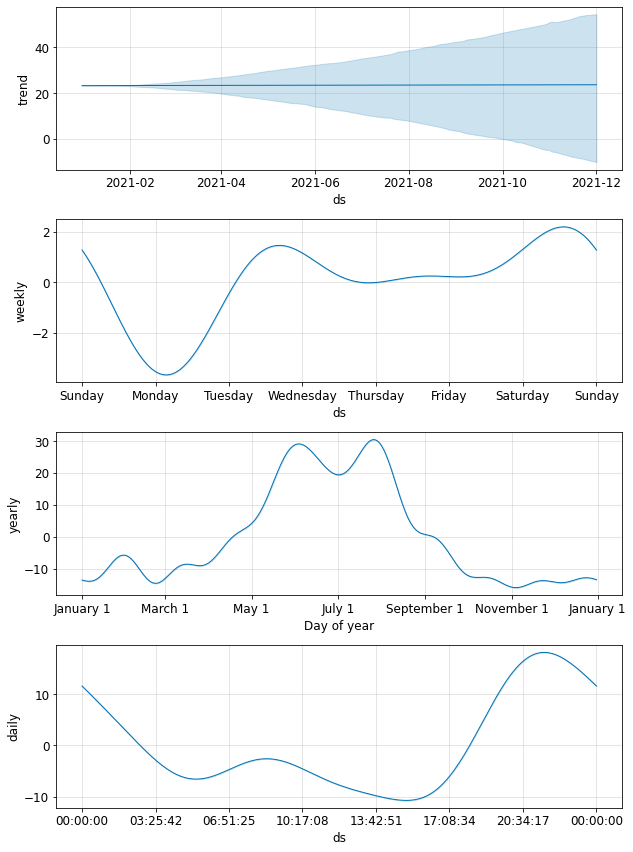

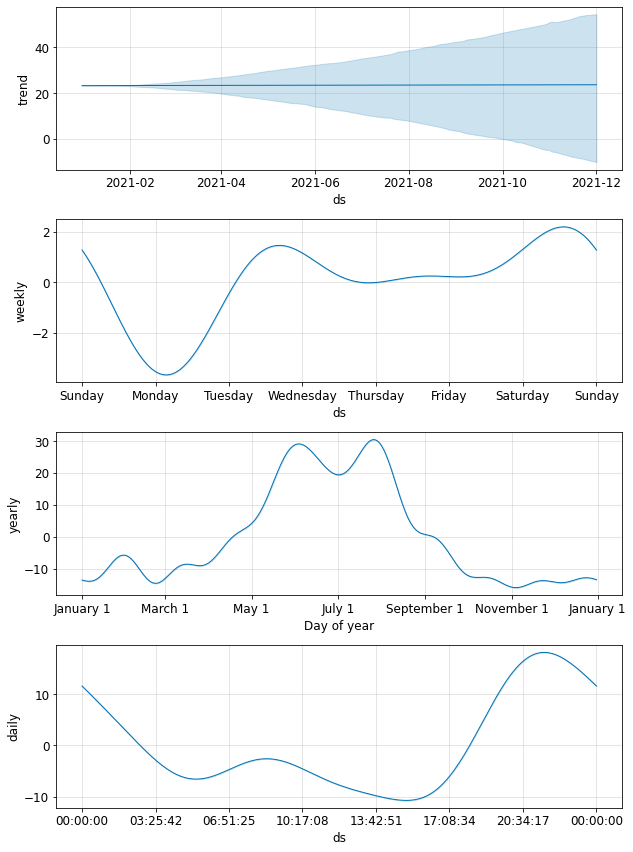

In [23]:
model.plot_components(forecast)

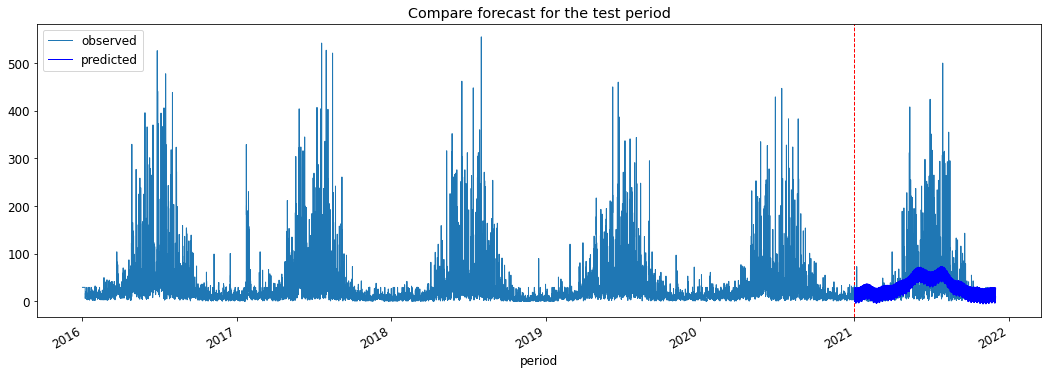

In [24]:
fig, ax = plt.subplots(figsize=(18,6))

plt.axvline(pd.to_datetime(str(data_new.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
data_new.plot(x="period", y="value", ax=ax, label="observed")

ax.plot(pd.to_datetime(data_new.loc[test_range].period.values), yhat_test,
        color="blue", label="predicted")

plt.legend(loc='best')
plt.title('Compare forecast for the test period')

#plt.savefig('images/prophet-forecast-testrange.png')
plt.show();

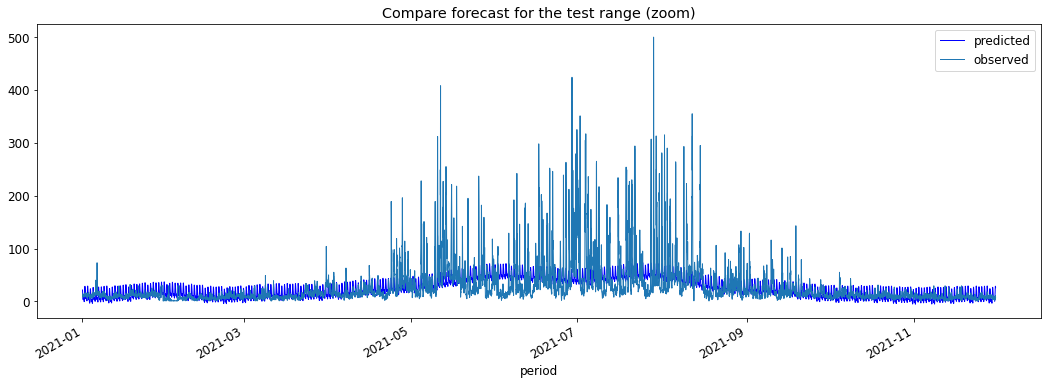

In [25]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(data_new.loc[test_range].period.values), yhat_test,
        color="blue", label="predicted")

data_new.loc[test_range].plot(x="period", y="value", ax=ax, label="observed")
plt.legend(loc='best')

plt.title('Compare forecast for the test range (zoom)')

plt.show();

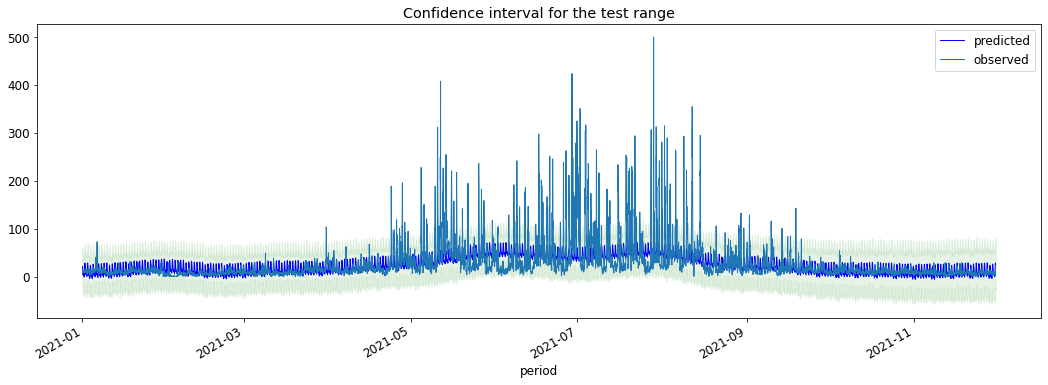

In [26]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(data_new.loc[test_range].period.values), yhat_test,
        color="blue", label="predicted")

ax.fill_between(
    forecast_ci.index.to_pydatetime(),
    forecast_ci['yhat_lower'],
    forecast_ci['yhat_upper'],
    color='g',
    alpha=0.1)

data_new.loc[test_range].plot(x="period", y="value", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Confidence interval for the test range')

plt.show();

# Evaluación de la predicción

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def theils_u_metric(y_true, y_pred):
    """Calculate Theil's U statistics using observed and predicted vectors."""
    SS_res =  np.mean(np.square(y_true - y_pred))
    SS_true = np.mean(np.square(y_true))
    SS_pred = np.mean(np.square(y_pred))
    
    return np.sqrt(SS_res / (SS_true * SS_pred))

In [28]:
mae = mean_absolute_error(y_test, yhat_test)
mse = mean_squared_error(y_test, yhat_test)
r2 = r2_score(y_test, yhat_test)
u = theils_u_metric(y_test, yhat_test)

print("MAE (test): {:0.0f}".format(mae))
print("MSE (test): {:0.0f}".format(mse))
print("R2  (test): {:0.3f}".format(r2))
print("U   (test): {:0.6f}".format(u))



MAE (test): 18
MSE (test): 1107
R2  (test): 0.289
U   (test): 0.022597


Se pueden realizar las simulaciones y entrenamiento para las distintas ventanas de tiempo, se realiza en primer lugar todo el espectro de tiempo obteniendo los resultados TOTAL con 2 años de test. Luego se procede a eliminar los datos hasta el 2015, por lo que en la segunda simulación se consideran solo los datos a partir del 2015, también con dos años de test.
Como tercera prueba se toman los datos a partir del 2016 y un solo año de test, para finalizar con una ventana de tiempo desde el 2016 pero con dos años de test. 

De los resultados obtenidos, se logra apreciar que los mejores valores para las pruebas realizadas corresponde al proceso de entrenamiento que considera una ventana de tiempo a partir del año 2016 y dos años, ya que los valores de MAE y MSE son menores y R2 es mayor. En el caso del rango desde el 2016 pero solo un año de entrenamiento, el R2 es mayor pero el MAE empeora.

Por lo tanto, se considera y concluye que el mejor proceso de entrenamiento se logra al filtrar la serie de tiempo a partir del año 2016 y considerar 2 años de test.

Total
MAE (test): 22
MSE (test): 1166
R2  (test): 0.051
U   (test): 0.020717

Desde el 2015
MAE (test): 18
MSE (test): 896
R2  (test): 0.270
U   (test): 0.019101

Desde el 2016, 1 año de test
MAE (test): 18
MSE (test): 1107
R2  (test): 0.289
U   (test): 0.022597

Desde el 2016, 2 año de test
MAE (test): 18
MSE (test): 893
R2  (test): 0.273
U   (test): 0.019387